# Data visualization with matplotlib

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("SAFI_full_shortname.csv")

In [4]:
df.head(2)

,key_id,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e


<AxesSubplot:>

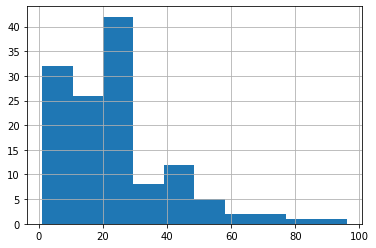

In [6]:
# make histogram
df['years_liv'].hist()

<AxesSubplot:>

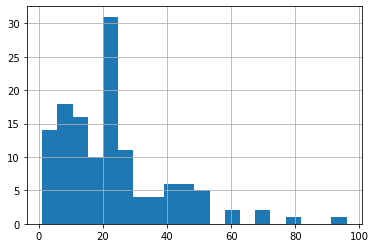

In [7]:
df['years_liv'].hist(bins=20)

array([[<AxesSubplot:title={'center':'years_liv'}>]], dtype=object)

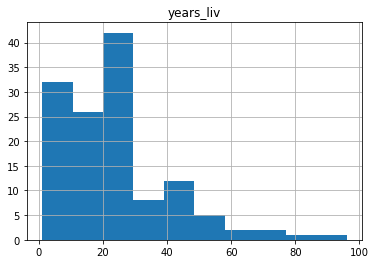

In [8]:
df.hist(column='years_liv')

array([[<AxesSubplot:title={'center':'Chirodzo'}>,
        <AxesSubplot:title={'center':'God'}>],
       [<AxesSubplot:title={'center':'Ruaca'}>, <AxesSubplot:>]],
      dtype=object)

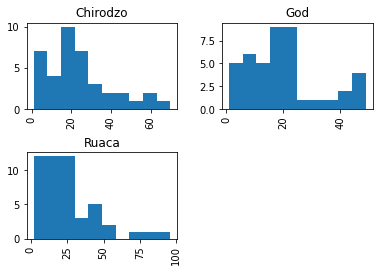

In [9]:
# groupby + histogram
df.hist(column='years_liv', by='village')

array([<AxesSubplot:title={'center':'Chirodzo'}>,
       <AxesSubplot:title={'center':'God'}>,
       <AxesSubplot:title={'center':'Ruaca'}>], dtype=object)

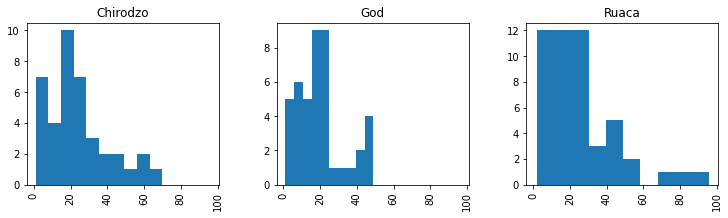

In [12]:
df.hist(column='years_liv', by='village', layout=(1,3), figsize=[12,3], sharex=True)

In [14]:
df.to_csv("my_SAFI_dataset.csv")

<AxesSubplot:xlabel='gps_Latitude', ylabel='gps_Longitude'>

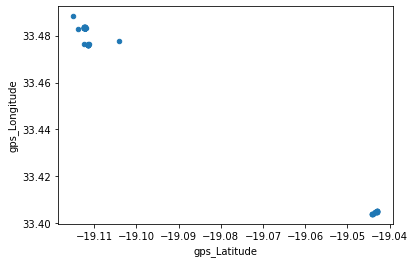

In [15]:
# scatter plot
df.plot.scatter(x='gps_Latitude', y='gps_Longitude')

<AxesSubplot:xlabel='gps_Latitude', ylabel='gps_Longitude'>

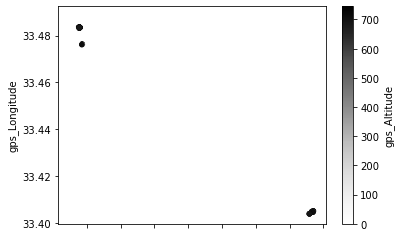

In [16]:
df.plot.scatter(x='gps_Latitude', y='gps_Longitude', c='gps_Altitude')

<AxesSubplot:xlabel='gps_Latitude', ylabel='gps_Longitude'>

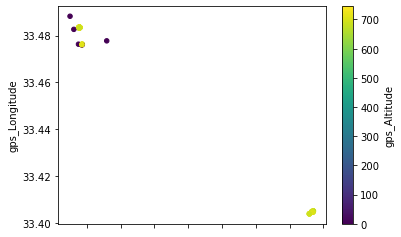

In [17]:
df.plot.scatter(x='gps_Latitude', y='gps_Longitude', c='gps_Altitude', colormap='viridis')

### Exercise: Plotting with Pandas

1. Make a scatter plot of `years_farm` vs `years_liv` and color the points by `buildings_in_compound`.
2. Make a bar plot of the mean number of rooms per wall type (use columns `rooms` and `respondent_wall_type`).
3. (optional) Try plotting by both wall and roof type (`respondent_roof_type`)!

<AxesSubplot:xlabel='years_liv', ylabel='years_farm'>

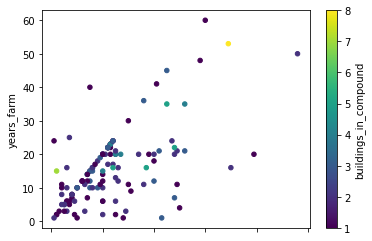

In [19]:
df.plot.scatter(x='years_liv', y='years_farm', c='buildings_in_compound', colormap='viridis')

In [25]:
grouped = df.groupby('respondent_wall_type')
room_means = grouped.mean()['rooms']

In [27]:
room_means

respondent_wall_type
burntbricks    2.104478
cement         3.000000
muddaub        1.260870
sunbricks      1.529412
Name: rooms, dtype: float64

<AxesSubplot:xlabel='respondent_wall_type'>

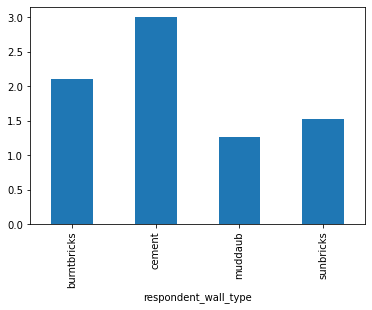

In [26]:
room_means.plot.bar()

<AxesSubplot:xlabel='respondent_wall_type,respondent_roof_type'>

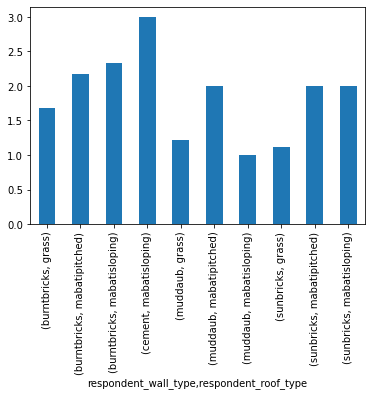

In [29]:
grouped = df.groupby(['respondent_wall_type', 'respondent_roof_type'])
room_means = grouped.mean()['rooms']
room_means.plot.bar()

array([[<AxesSubplot:title={'center':'burntbricks'}>,
        <AxesSubplot:title={'center':'cement'}>],
       [<AxesSubplot:title={'center':'muddaub'}>,
        <AxesSubplot:title={'center':'sunbricks'}>]], dtype=object)

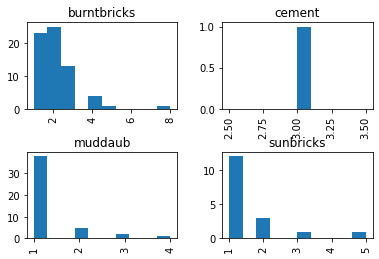

In [30]:
df.hist(column='rooms', by='respondent_wall_type')

<AxesSubplot:>

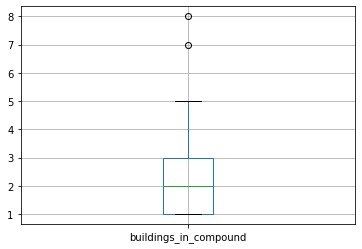

In [33]:
# box plots 
df.boxplot(column='buildings_in_compound')

<AxesSubplot:title={'center':'buildings_in_compound'}, xlabel='village'>

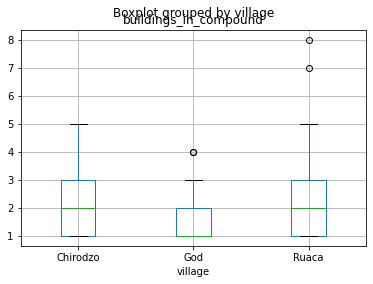

In [32]:
df.boxplot(column=['buildings_in_compound'], by="village")

In [36]:
import seaborn as sns

<AxesSubplot:xlabel='village', ylabel='buildings_in_compound'>

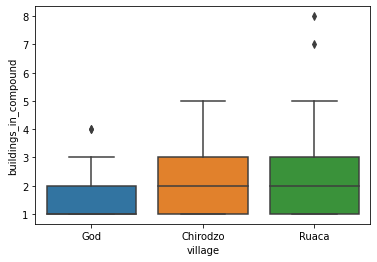

In [38]:
sns.boxplot(data=df, x='village', y='buildings_in_compound')

In [39]:
#!pip install seaborn

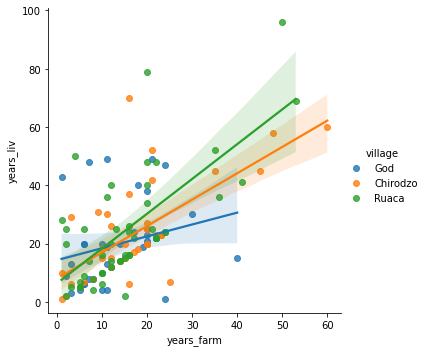

In [41]:
sns.lmplot(data=df, x='years_farm', y='years_liv', hue='village')

In [42]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'buildings_in_compound'}, xlabel='village'>

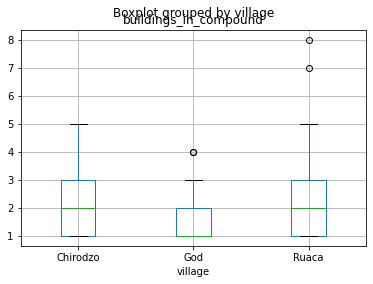

In [43]:
df.boxplot(column=['buildings_in_compound'], by="village")

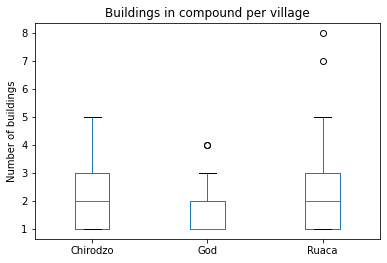

In [53]:
df.boxplot(column=['buildings_in_compound'], by="village")
plt.title('Buildings in compound per village')
plt.suptitle('')
plt.ylabel('Number of buildings')
plt.xlabel('')
plt.grid(None)
plt.savefig('figure.pdf')  # save file PDF, PNG
plt.savefig('figure.png', dpi=150)  # save file PDF, PNG

### Exercise: Recap
Take a few minutes to write down your thoughts on what we learned in this course:
* What questions do you still have?
* Whether there are any incremental improvements that can benefit your projects?
* What’s nice that we learnt but is overkill for your current work?